In [2]:
import sympy

In [3]:
from sympy import *

In [4]:
lmd = symbols('\lambda')
lmd = 7
c = symbols('c')

In [5]:
x1, x2, x3, x4, x5, x6, z1, z2, z3, z4, z5, z6 = symbols('x_1 x_2 x_3 x_4 x_5 x_6 z_1 z_2 z_3 z_4 z_5 z_6')

In [6]:
cost = x1+x1+x2+x1+x5+x2+x6+(x1+x5)**2+(x2+x3)**2+(x2+x3+x6)**2+x3+x4+x4+x4+x4

In [7]:
expand(cost)

x_1**2 + 2*x_1*x_5 + 3*x_1 + 2*x_2**2 + 4*x_2*x_3 + 2*x_2*x_6 + 2*x_2 + 2*x_3**2 + 2*x_3*x_6 + x_3 + 4*x_4 + x_5**2 + x_5 + x_6**2 + x_6

(remembering that x^2 = x in binary)

In [10]:
x1 = (1-z1)/2
x2 = (1-z2)/2
x3 = (1-z3)/2
x4 = (1-z4)/2
x5 = (1-z5)/2
x6 = (1-z6)/2

In [9]:
expand(4*x1+4*x2+3*x3+3*x4+2*x5+2*x6+2*x1*x5+4*x2*x3+2*x2*x6+2*x3*x6+lmd*(-x1-x2+2*x1*x2+1-x3-x4+2*x3*x4+1-x5-x6+2*x5*x6+1))

7*z_1*z_2/2 + z_1*z_5/2 - 5*z_1/2 + z_2*z_3 + z_2*z_6/2 - 7*z_2/2 + 7*z_3*z_4/2 + z_3*z_6/2 - 3*z_3 - 3*z_4/2 + 7*z_5*z_6/2 - 3*z_5/2 - 2*z_6 + 22

In [11]:
coeff = {z1 : -5/2,
        z2 : -7/2,
        z3 : -3,
        z4 : -3/2,
        z5 : -3/2,
        z6 : -2,
        z1*z2 : 7/2,
        z1*z5 : 1/2,
        z2*z3 : 1,
        z2*z6 : 1/2,
        z3*z4 : 7/2,
        z3*z6 : 1/2,
        z5*z6 : 7/2,
        'con' : 22
        }

In [22]:
coeff = [-5/2,
        -7/2,
        -3,
        -3/2,
        -3/2,
        -2,
        7/2,
        1/2,
        1,
        1/2,
        7/2,
        1/2,
        7/2,
        22
         ]
coeff[1]

-3.5

In [24]:
def zrotate2q(circ, b, c, theta):
    circ.cx(b,c)
    circ.u1(theta, c)
    circ.cx(b,c)
    global cxno 
    cxno += 2
    
def STEPCX(circ, b, c, d):
    circ.cx(b,c)
    circ.cx(c,d)
    circ.cx(b,c)
    global cxno 
    cxno += 3
    
def STEP2CX(circ, b, c, d, e):
    circ.cx(b,c)
    circ.cx(c,d)
    circ.cx(d,e)
    circ.cx(c,d)
    circ.cx(b,c)
    global cxno 
    cxno += 5

def zrotate3qstep(circ, b, c, d, theta):
    STEPCX(circ, b, c, d)
    circ.u1(theta, d)
    STEPCX(circ, b, c, d)

In [12]:
%matplotlib inline

# Importing standard Qiskit libraries and configuring account
import numpy as np
from qiskit import *
from qiskit.visualization import *
from qiskit import IBMQ

In [13]:
provider = IBMQ.load_account()

In [25]:
k_array = []
k_dict = {}

for k in range(1,41):
    
    alpha1 = 0.05*17*np.pi
    beta1 = -0.05*k*np.pi
    alpha2 = 0.05*15*np.pi
    beta2 = -0.05*4.9*np.pi
    alpha3 = 0.05*35*np.pi
    beta3 = -0.05*4*np.pi
    alpha4 = 0.05*10*np.pi
    beta4 = -0.05*3*np.pi
    alpha5 = 0.05*31*np.pi
    beta5 = -0.05*2*np.pi
    alpha6 = 0.05*34*np.pi
    beta6 = -0.05*2.1*np.pi
    
    qc = QuantumCircuit(q, c)
    qc.h(q[0:6])
    cxno = int(0)
    
    for i in range(1,7):
        qc.u1(coeff[i-1]*alpha1,q[i-1])
        
    zrotate2q(qc, q[0], q[1], coeff[6]*alpha1)
    zrotate2q(qc, q[0], q[4], coeff[7]*alpha1)
    zrotate2q(qc, q[1], q[2], coeff[8]*alpha1)
    zrotate2q(qc, q[1], q[5], coeff[9]*alpha1)
    zrotate2q(qc, q[2], q[3], coeff[10]*alpha1)
    zrotate2q(qc, q[2], q[5], coeff[11]*alpha1)
    zrotate2q(qc, q[4], q[5], coeff[12]*alpha1)

    for i in range(6):
        qc.rx(beta1,q[i])

    for i in range(1,7):
        qc.u1(coeff[i-1]*alpha2,q[i-1])
        
    zrotate2q(qc, q[0], q[1], coeff[6]*alpha2)
    zrotate2q(qc, q[0], q[4], coeff[7]*alpha2)
    zrotate2q(qc, q[1], q[2], coeff[8]*alpha2)
    zrotate2q(qc, q[1], q[5], coeff[9]*alpha2)
    zrotate2q(qc, q[2], q[3], coeff[10]*alpha2)
    zrotate2q(qc, q[2], q[5], coeff[11]*alpha2)
    zrotate2q(qc, q[4], q[5], coeff[12]*alpha2)

    for i in range(6):
        qc.rx(beta2,q[i])
    
    for i in range(1,7):
        qc.u1(coeff[i-1]*alpha3,q[i-1])
        
    zrotate2q(qc, q[0], q[1], coeff[6]*alpha3)
    zrotate2q(qc, q[0], q[4], coeff[7]*alpha3)
    zrotate2q(qc, q[1], q[2], coeff[8]*alpha3)
    zrotate2q(qc, q[1], q[5], coeff[9]*alpha3)
    zrotate2q(qc, q[2], q[3], coeff[10]*alpha3)
    zrotate2q(qc, q[2], q[5], coeff[11]*alpha3)
    zrotate2q(qc, q[4], q[5], coeff[12]*alpha3)

    for i in range(6):
        qc.rx(beta3,q[i])

    for i in range(1,7):
        qc.u1(coeff[i-1]*alpha4,q[i-1])
        
    zrotate2q(qc, q[0], q[1], coeff[6]*alpha4)
    zrotate2q(qc, q[0], q[4], coeff[7]*alpha4)
    zrotate2q(qc, q[1], q[2], coeff[8]*alpha4)
    zrotate2q(qc, q[1], q[5], coeff[9]*alpha4)
    zrotate2q(qc, q[2], q[3], coeff[10]*alpha4)
    zrotate2q(qc, q[2], q[5], coeff[11]*alpha4)
    zrotate2q(qc, q[4], q[5], coeff[12]*alpha4)

    for i in range(6):
        qc.rx(beta4,q[i])

    qc.measure(q,c)
    
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots = 8126)
    result_sim = job.result()
    counts_sim = result_sim.get_counts(qc)
    if '010110' in counts_sim:
        a1 = counts_sim['010110']
    else:
        a1 = 0
    if '100101' in counts_sim:
        a2 = counts_sim['100101']
    else:
        a2 = 0
    a = a1+a2
    k_array.append(a)
    k_dict.update({k:a})
    
print(k_dict)
    
maxcount = np.amax(k_array)
index = np.where(k_array == maxcount)
print("\n The maximum count is", maxcount, "with k-1 value(s) of", index[0] )
print("\nThe total number of CNOTs used is", cxno)

{1: 465, 2: 493, 3: 618, 4: 823, 5: 983, 6: 1250, 7: 1646, 8: 1943, 9: 2212, 10: 2461, 11: 2578, 12: 2569, 13: 2470, 14: 2277, 15: 1997, 16: 1718, 17: 1433, 18: 1245, 19: 940, 20: 708, 21: 591, 22: 430, 23: 327, 24: 267, 25: 206, 26: 214, 27: 216, 28: 209, 29: 242, 30: 256, 31: 276, 32: 305, 33: 368, 34: 354, 35: 415, 36: 409, 37: 435, 38: 424, 39: 396, 40: 433}

 The maximum count is 2578 with k-1 value(s) of [10]

The total number of CNOTs used is 56


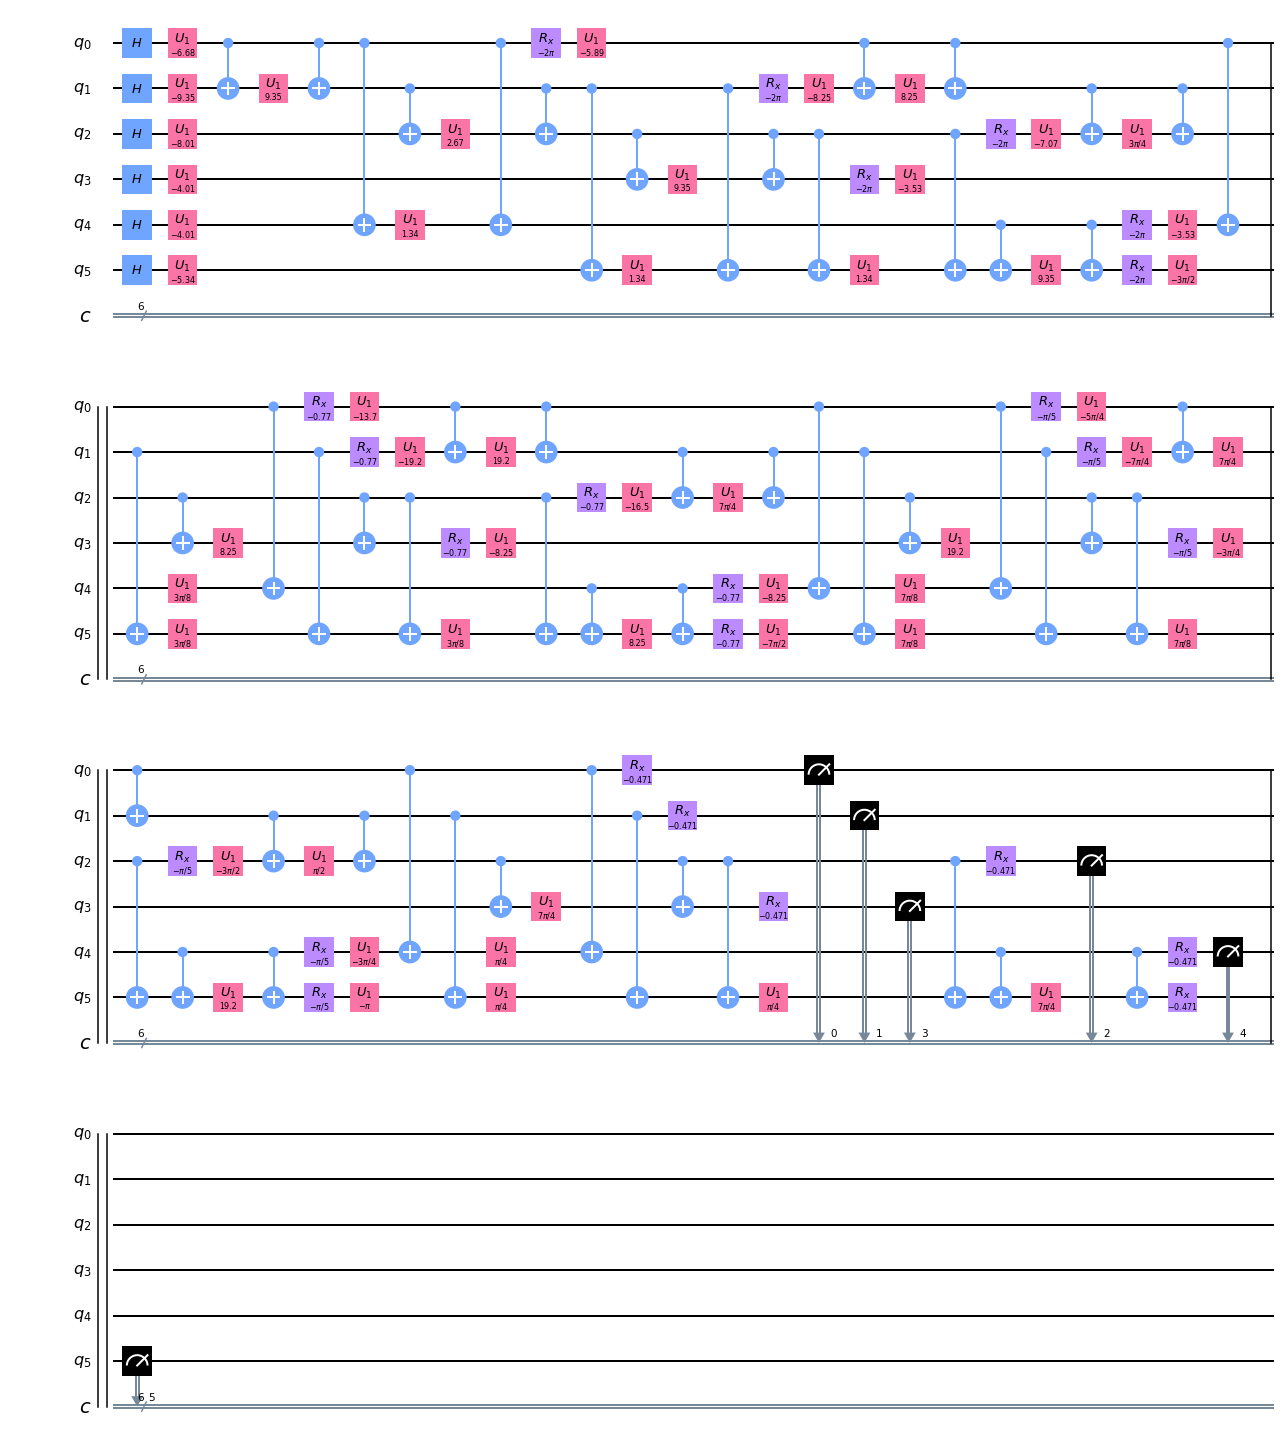

In [26]:
qc.draw(output='mpl')

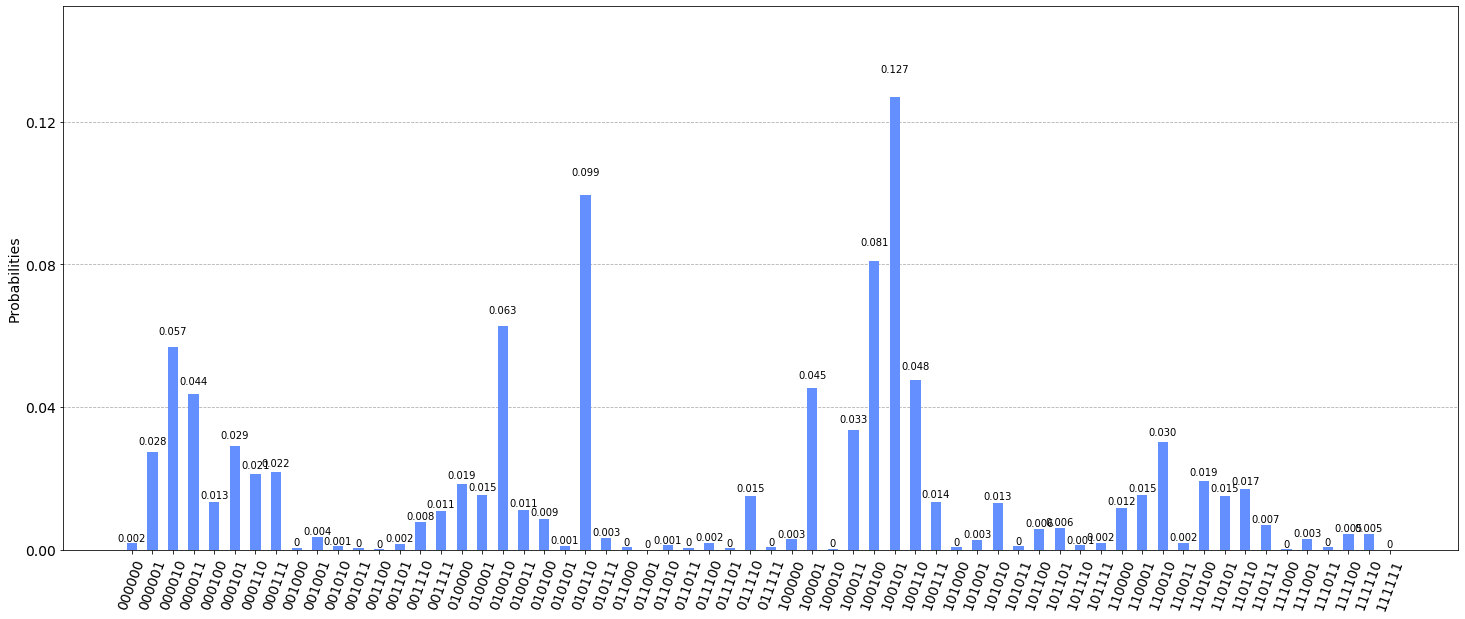

In [27]:
alpha1 = 0.05*17*np.pi
beta1 = -0.05*11*np.pi
alpha2 = 0.05*15*np.pi
beta2 = -0.05*4.9*np.pi
alpha3 = 0.05*35*np.pi
beta3 = -0.05*4*np.pi
alpha4 = 0.05*10*np.pi
beta4 = -0.05*3*np.pi
alpha5 = 0.05*31*np.pi
beta5 = -0.05*2*np.pi
alpha6 = 0.05*34*np.pi
beta6 = -0.05*2.1*np.pi

qc = QuantumCircuit(q, c)
qc.h(q[0:6])

for i in range(1,7):
    qc.u1(coeff[i-1]*alpha1,q[i-1])

zrotate2q(qc, q[0], q[1], coeff[6]*alpha1)
zrotate2q(qc, q[0], q[4], coeff[7]*alpha1)
zrotate2q(qc, q[1], q[2], coeff[8]*alpha1)
zrotate2q(qc, q[1], q[5], coeff[9]*alpha1)
zrotate2q(qc, q[2], q[3], coeff[10]*alpha1)
zrotate2q(qc, q[2], q[5], coeff[11]*alpha1)
zrotate2q(qc, q[4], q[5], coeff[12]*alpha1)

for i in range(6):
    qc.rx(beta1,q[i])

for i in range(1,7):
    qc.u1(coeff[i-1]*alpha2,q[i-1])

zrotate2q(qc, q[0], q[1], coeff[6]*alpha2)
zrotate2q(qc, q[0], q[4], coeff[7]*alpha2)
zrotate2q(qc, q[1], q[2], coeff[8]*alpha2)
zrotate2q(qc, q[1], q[5], coeff[9]*alpha2)
zrotate2q(qc, q[2], q[3], coeff[10]*alpha2)
zrotate2q(qc, q[2], q[5], coeff[11]*alpha2)
zrotate2q(qc, q[4], q[5], coeff[12]*alpha2)

for i in range(6):
    qc.rx(beta2,q[i])

for i in range(1,7):
    qc.u1(coeff[i-1]*alpha3,q[i-1])

zrotate2q(qc, q[0], q[1], coeff[6]*alpha3)
zrotate2q(qc, q[0], q[4], coeff[7]*alpha3)
zrotate2q(qc, q[1], q[2], coeff[8]*alpha3)
zrotate2q(qc, q[1], q[5], coeff[9]*alpha3)
zrotate2q(qc, q[2], q[3], coeff[10]*alpha3)
zrotate2q(qc, q[2], q[5], coeff[11]*alpha3)
zrotate2q(qc, q[4], q[5], coeff[12]*alpha3)

for i in range(6):
    qc.rx(beta3,q[i])

qc.measure(q,c)

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots = 8126)
result_sim = job.result()
counts_sim2 = result_sim.get_counts(qc)
plot_histogram([counts_sim2], figsize=(25,10))

In [35]:
q = QuantumRegister(9,'q')
c = ClassicalRegister(6, 'c')
alpha1 = 0.05*17*np.pi
beta1 = -0.05*11*np.pi
alpha2 = 0.05*15*np.pi
beta2 = -0.05*4.9*np.pi
alpha3 = 0.05*35*np.pi
beta3 = -0.05*4*np.pi

qc = QuantumCircuit(q, c)
qc.h(q[1:7])

for i in range(1,7):
    qc.u1(coeff[i-1]*alpha1,q[i])

zrotate2q(qc, q[1], q[2], coeff[6]*alpha1)
zrotate2q(qc, q[1], q[5], coeff[7]*alpha1)
zrotate2q(qc, q[5], q[6], coeff[12]*alpha1)

qc.swap(q[0],q[1])
cxno += 3
qc.swap(q[5],q[7])
cxno += 3

zrotate2q(qc, q[2], q[3], coeff[8]*alpha1)
zrotate2q(qc, q[3], q[4], coeff[10]*alpha1)

qc.swap(q[1],q[2])
cxno += 3

zrotate3qstep(qc, q[1], q[5], q[6], coeff[9]*alpha1)

zrotate3qstep(qc, q[3], q[8], q[6], coeff[11]*alpha1)

qc.swap(q[1],q[2])
qc.swap(q[0],q[1])
qc.swap(q[5],q[7])
cxno += 9

for i in range(6):
    qc.rx(beta1,q[i+1])
    
for i in range(1,7):
    qc.u1(coeff[i-1]*alpha2,q[i])

zrotate2q(qc, q[1], q[2], coeff[6]*alpha2)
zrotate2q(qc, q[1], q[5], coeff[7]*alpha2)
zrotate2q(qc, q[5], q[6], coeff[12]*alpha2)

qc.swap(q[0],q[1])
qc.swap(q[5],q[7])
cxno += 6

zrotate2q(qc, q[2], q[3], coeff[8]*alpha2)
zrotate2q(qc, q[3], q[4], coeff[10]*alpha2)

qc.swap(q[1],q[2])
cxno += 3

zrotate3qstep(qc, q[1], q[5], q[6], coeff[9]*alpha2)

zrotate3qstep(qc, q[3], q[8], q[6], coeff[11]*alpha2)

qc.swap(q[1],q[2])
qc.swap(q[0],q[1])
qc.swap(q[5],q[7])
cxno += 9

for i in range(6):
    qc.rx(beta2,q[i+1])

for i in range(1,7):
    qc.u1(coeff[i-1]*alpha3,q[i])

zrotate2q(qc, q[1], q[2], coeff[6]*alpha3)
zrotate2q(qc, q[1], q[5], coeff[7]*alpha3)
zrotate2q(qc, q[5], q[6], coeff[12]*alpha3)

qc.swap(q[0],q[1])
qc.swap(q[5],q[7])
cxno += 6

zrotate2q(qc, q[2], q[3], coeff[8]*alpha3)
zrotate2q(qc, q[3], q[4], coeff[10]*alpha3)

qc.swap(q[1],q[2])
cxno += 3

zrotate3qstep(qc, q[1], q[5], q[6], coeff[9]*alpha3)

zrotate3qstep(qc, q[3], q[8], q[6], coeff[11]*alpha3)


qc.rx(beta3,q[0])
qc.rx(beta3,q[1])
qc.rx(beta3,q[3])
qc.rx(beta3,q[4])
qc.rx(beta3,q[6])
qc.rx(beta3,q[7])

    
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[3],c[2])
qc.measure(q[4],c[3])
qc.measure(q[7],c[4])
qc.measure(q[6],c[5])

In [33]:
provider = IBMQ.get_provider(group = 'uom-researchers')
backend = provider.get_backend('ibmq_johannesburg')

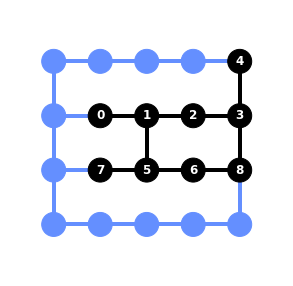

In [36]:
qc2 = transpile(qc, backend = backend, initial_layout = {q[0]:6, q[1]:7, q[2]:8, q[3]:9, q[4]:4, q[5]:12, q[6]:13, q[7]:11, q[8]:14}, optimization_level=0 )
plot_circuit_layout(qc2, backend)

In [37]:
from qiskit.tools.monitor import job_monitor
shots = 8192           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3        # Maximum number of credits to spend on executions. 

job_exp = execute(qc2, backend=backend, shots=shots, max_credits=max_credits)
job_monitor(job_exp)

Job Status: job has successfully run


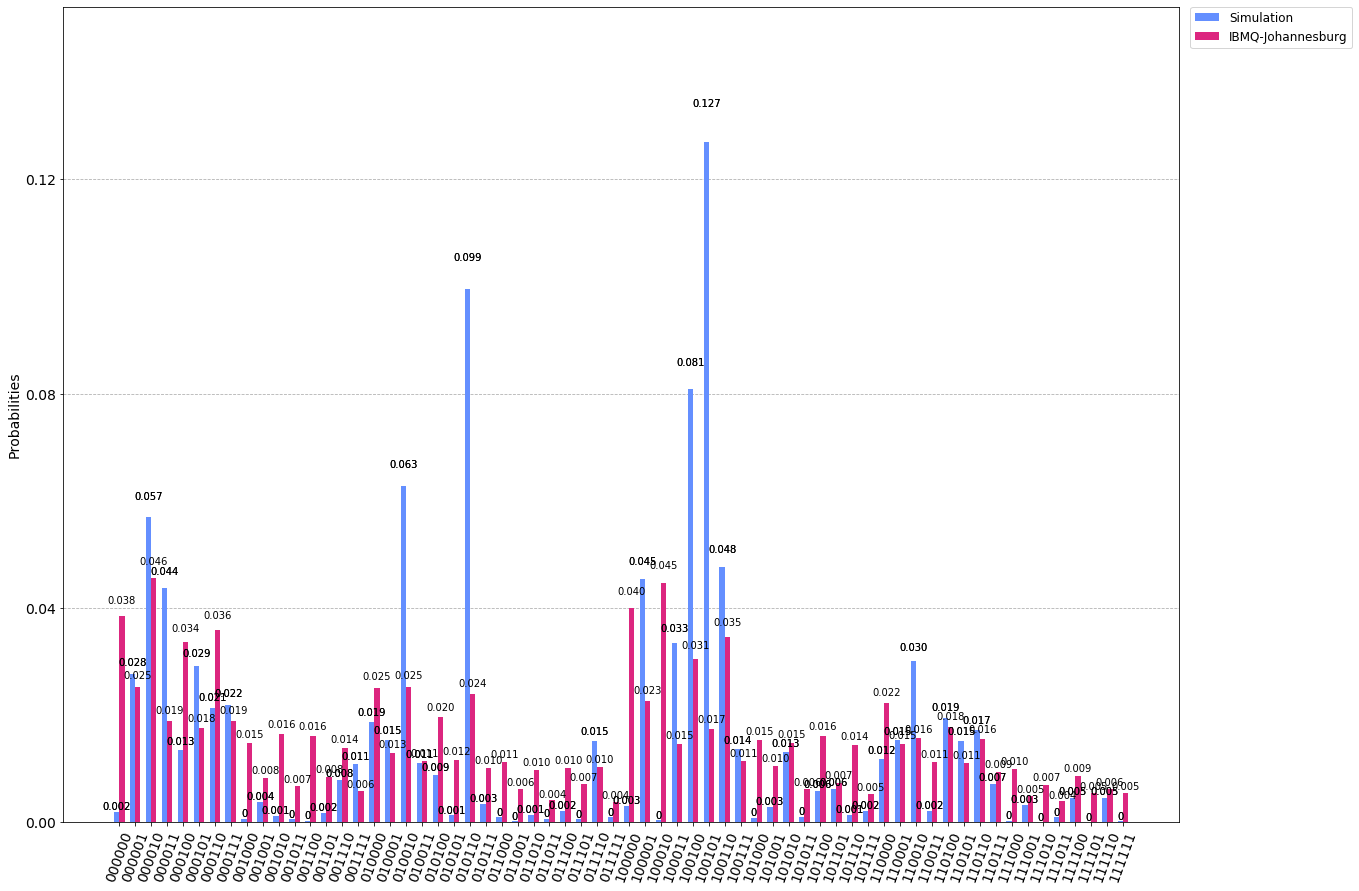

In [39]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(qc2)
plot_histogram([counts_sim2,counts_exp],figsize=(20,15), legend = ["Simulation", "IBMQ-Johannesburg"])